In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import pickle

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data, columns= boston.feature_names)

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos["Price"] = boston.target

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
file_name = 'bos.xlsx'

In [8]:
bos.to_excel(file_name)

In [9]:
bos.shape

(506, 14)

## performing  eda 

In [10]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## performing exploratory data analysis 

In [11]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### performing exploratory data analysi on boston

In [13]:
def distrubation(Data):
    sns.distplot(Data)

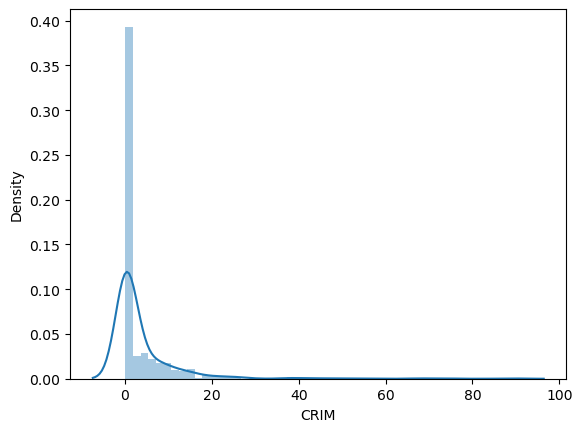

In [14]:
distrubation(bos['CRIM'])

In [15]:
def outliers(Data):
    sns.boxplot(Data)

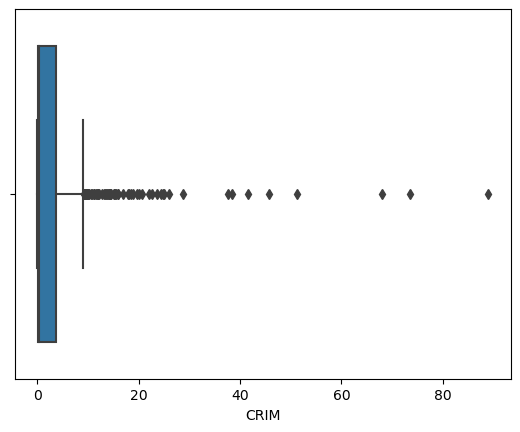

In [16]:
outliers(bos['CRIM'])

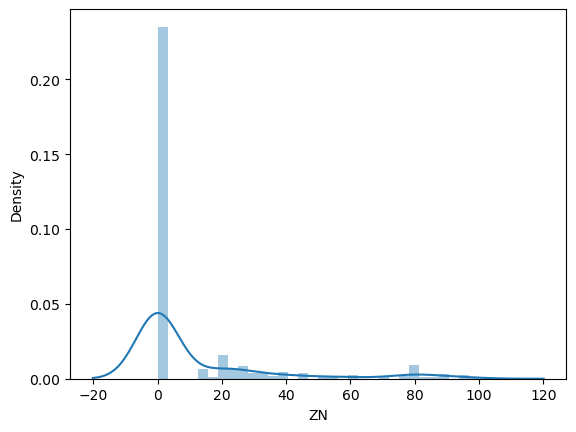

In [17]:
distrubation(bos['ZN'])

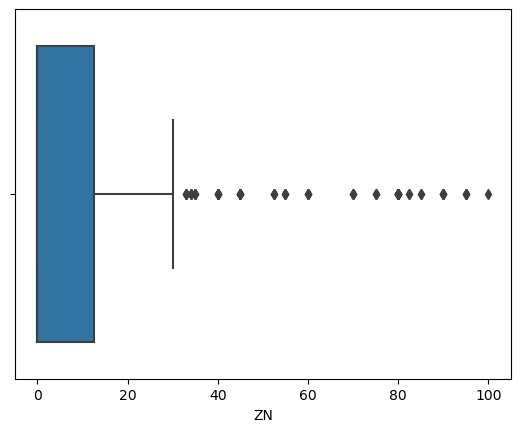

In [18]:
outliers(bos['ZN'])

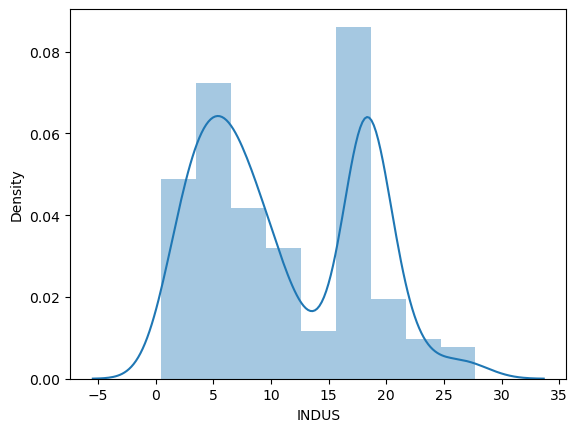

In [19]:
distrubation(bos['INDUS'])

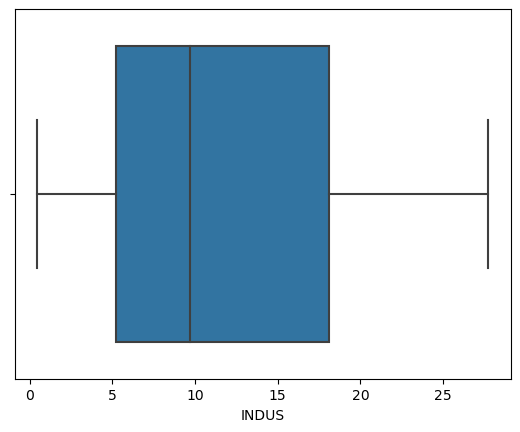

In [20]:
outliers(bos['INDUS'])

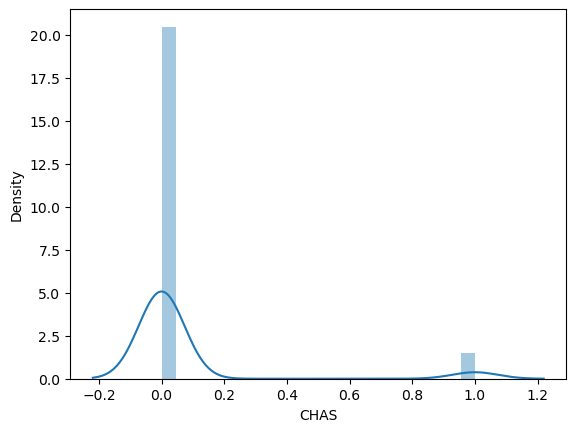

In [21]:
distrubation(bos['CHAS'])

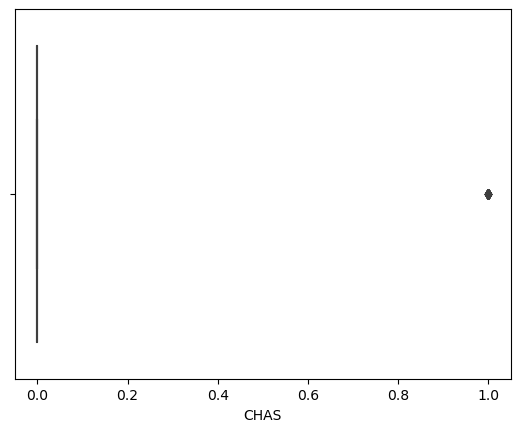

In [22]:
outliers(bos['CHAS'])

In [23]:
bos['CHAS']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

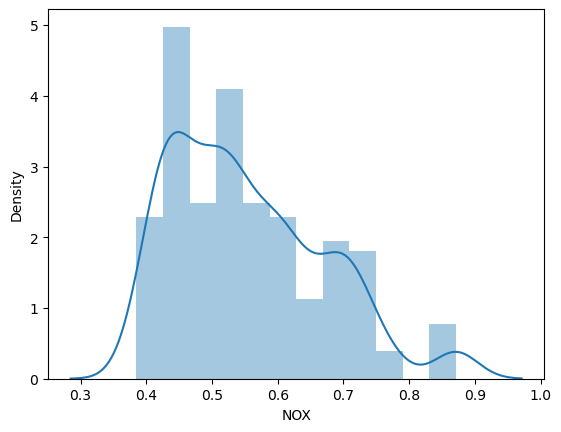

In [24]:
distrubation(bos['NOX'])

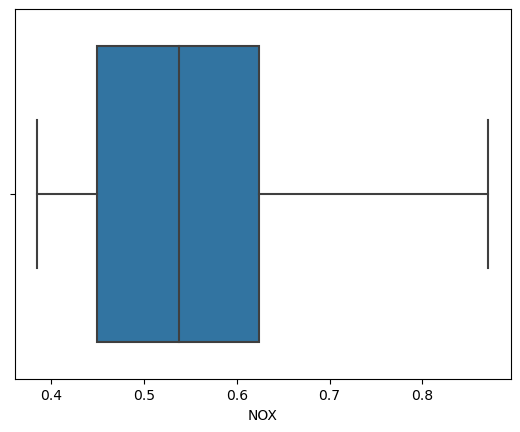

In [25]:
outliers(bos['NOX'])

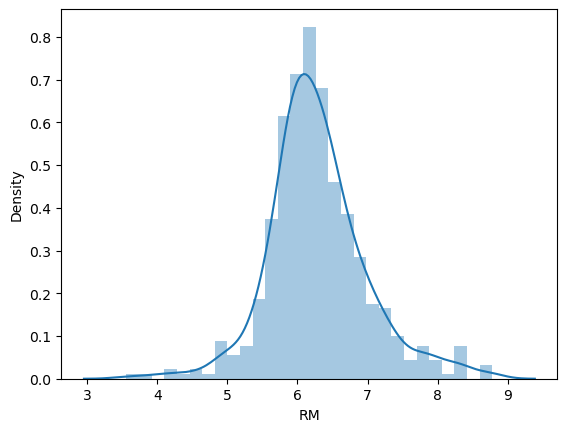

In [26]:
distrubation(bos['RM'])

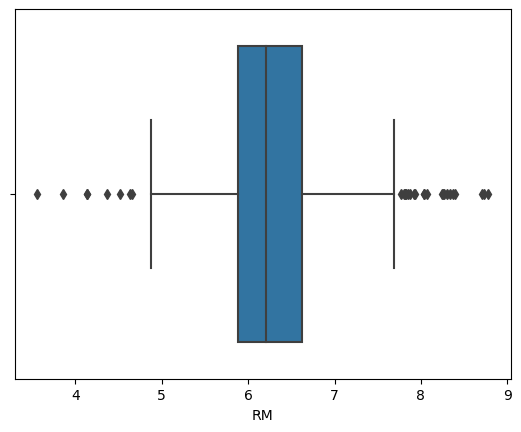

In [27]:
outliers(bos['RM'])

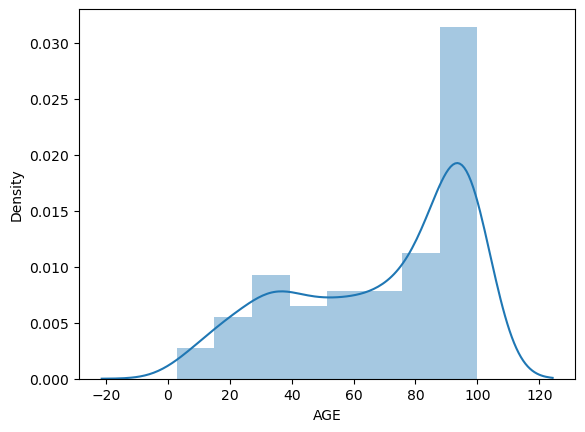

In [28]:
distrubation(bos['AGE'])

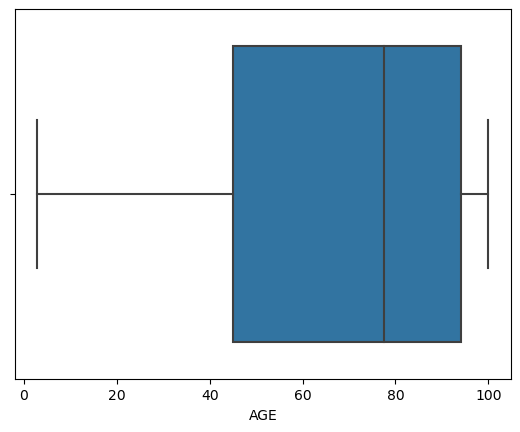

In [29]:
outliers(bos['AGE'])

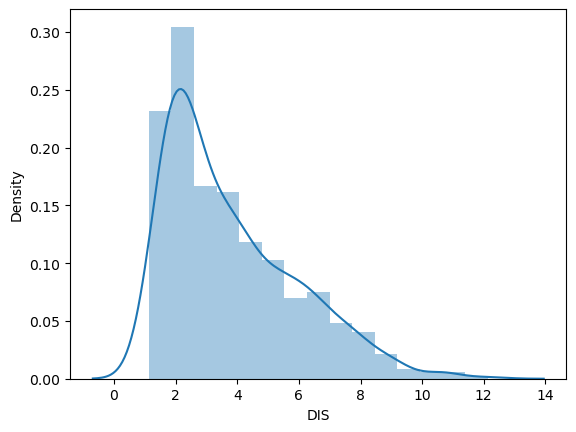

In [30]:
distrubation(bos['DIS'])

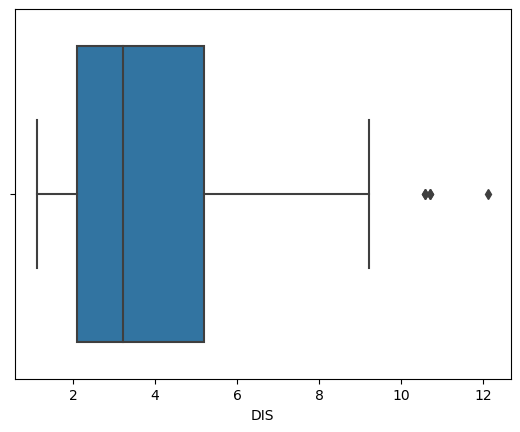

In [31]:
outliers(bos['DIS'])

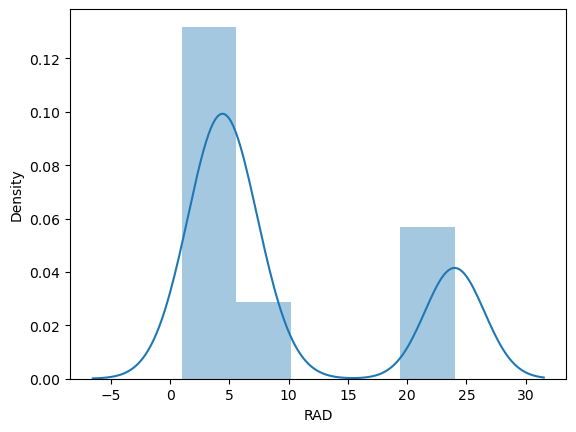

In [32]:
distrubation(bos['RAD'])

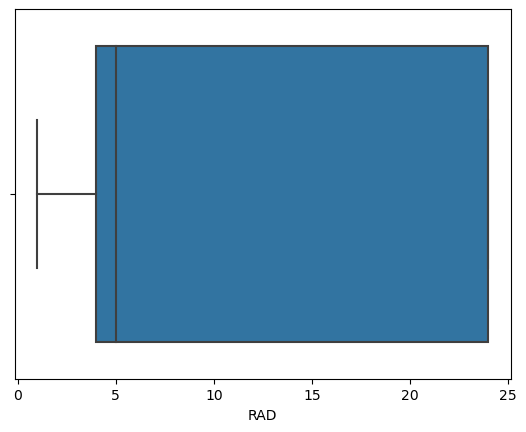

In [33]:
outliers(bos['RAD'])

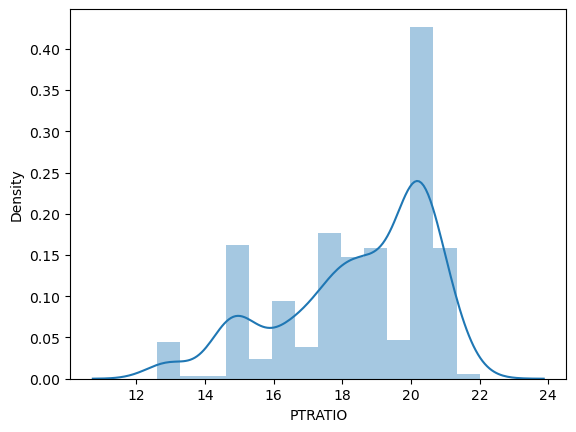

In [34]:
distrubation(bos['PTRATIO'])

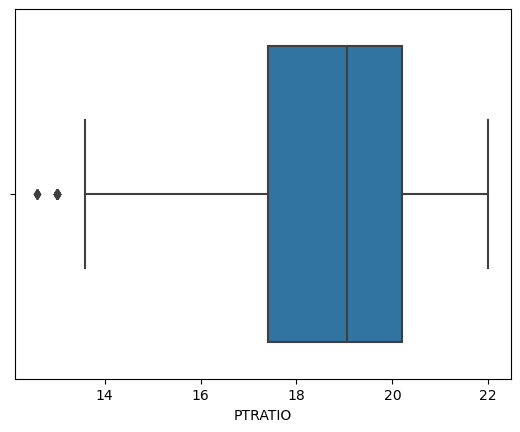

In [35]:
outliers(bos['PTRATIO'])

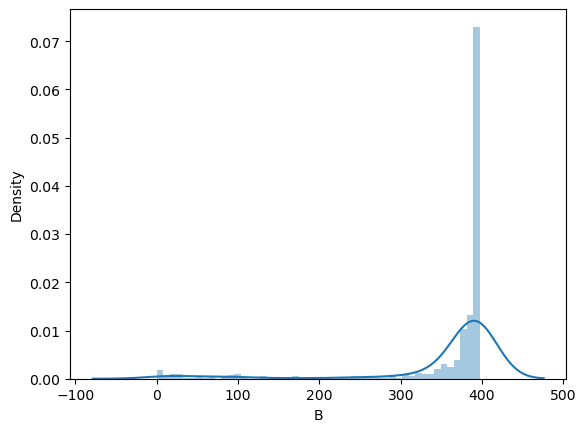

In [36]:
distrubation(bos['B'])

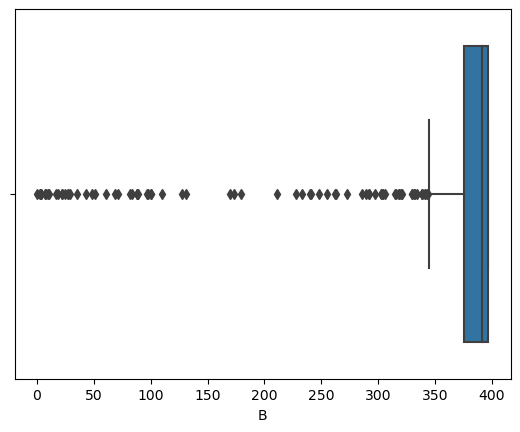

In [37]:
outliers(bos['B'])

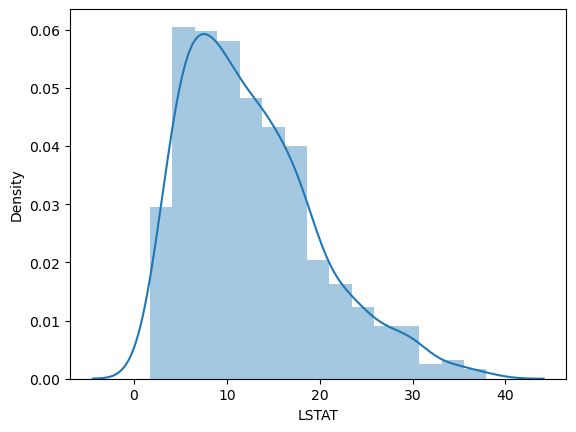

In [38]:
distrubation(bos['LSTAT'])

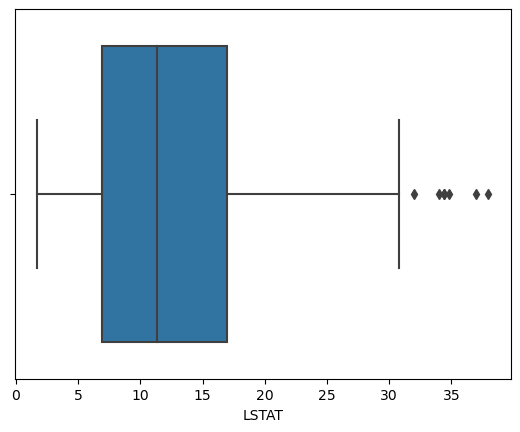

In [39]:
outliers(bos['LSTAT'])

## Cheking relation between dependent and independent 


In [40]:
def regplot(data1):
    sns.regplot(data1,bos['Price'])

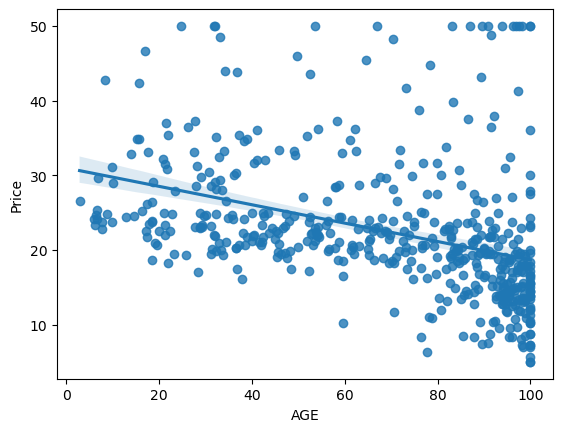

In [41]:
regplot   (bos['AGE'])

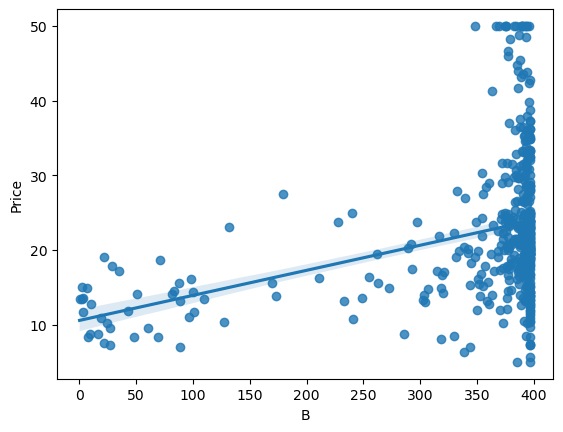

In [42]:
regplot   (bos['B'])

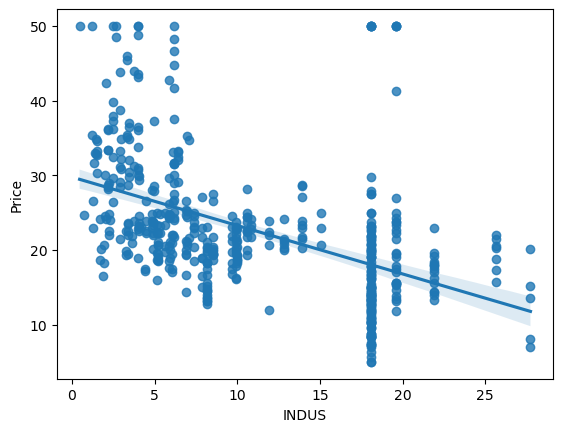

In [43]:
regplot   (bos['INDUS'])

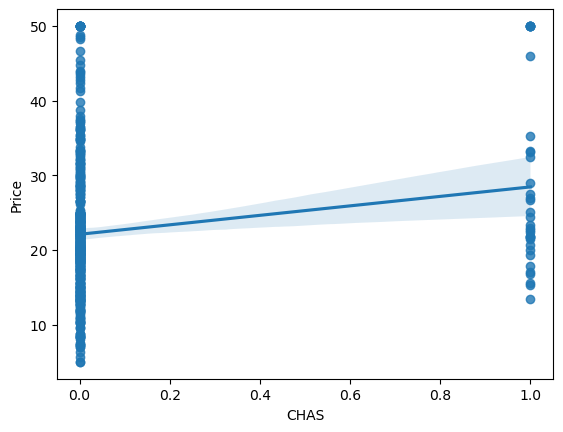

In [44]:
regplot(bos['CHAS'])

In [45]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

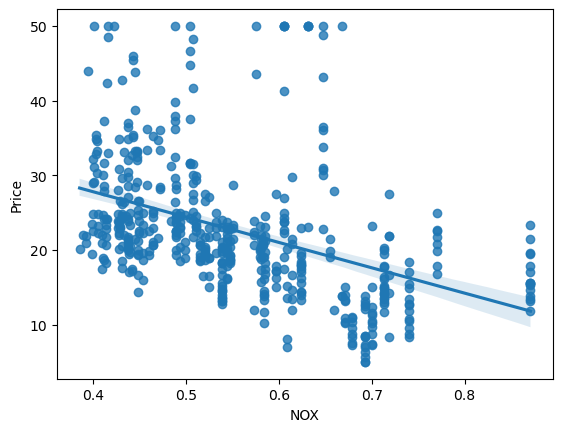

In [46]:
regplot(bos['NOX'])

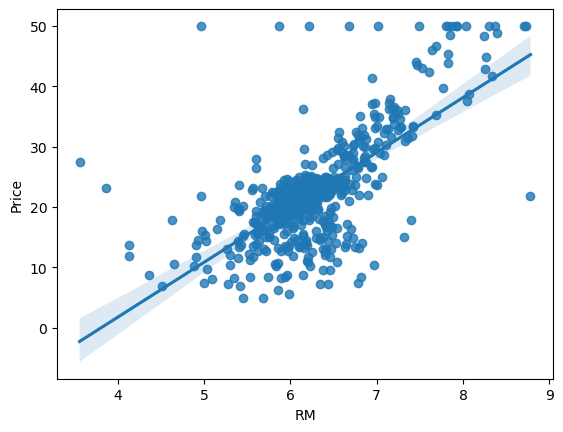

In [47]:
regplot(bos['RM'])

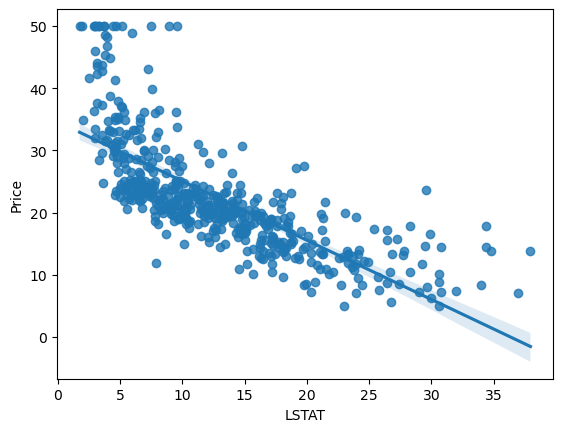

In [48]:
regplot(bos["LSTAT"])

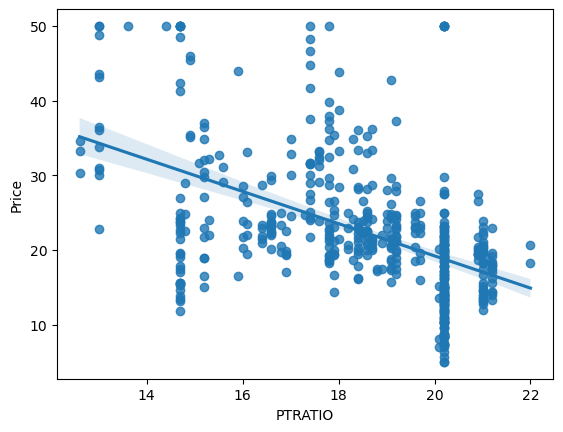

In [49]:
regplot(bos["PTRATIO"])

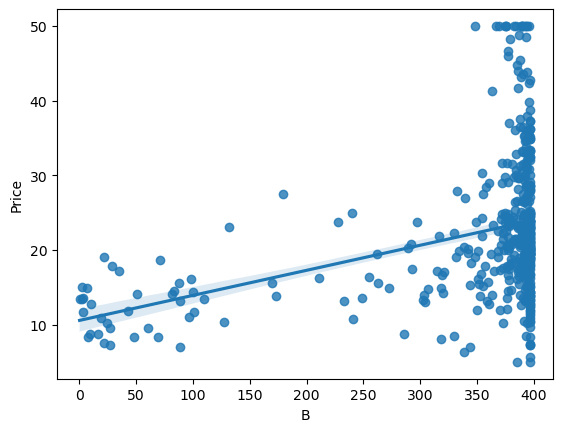

In [50]:
regplot(bos['B'])

## Checking x and y correlation 

In [51]:
def scatterplot(data):
    sns.scatterplot(data= bos, x = data , y = "Price")

In [52]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

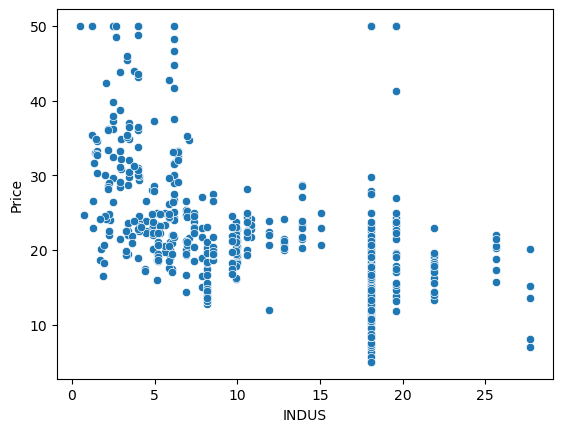

In [53]:
scatterplot(bos['INDUS'])

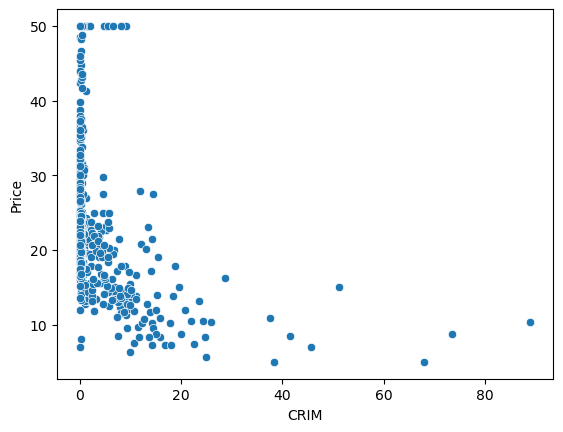

In [54]:
scatterplot(bos["CRIM"])

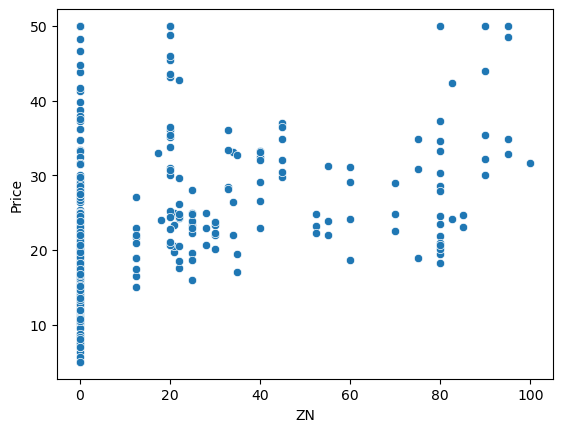

In [55]:
scatterplot(bos["ZN"])

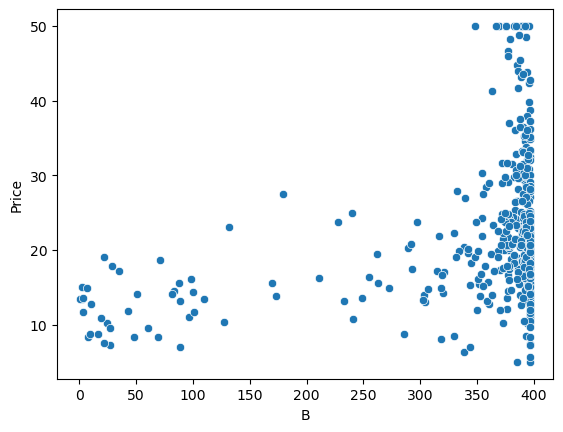

In [56]:
scatterplot(bos['B'])

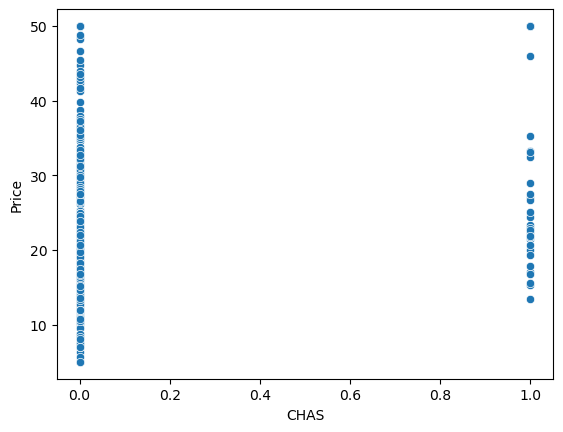

In [57]:
scatterplot(bos['CHAS'])

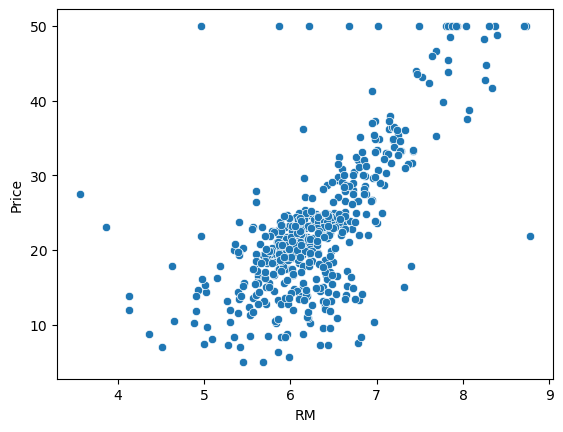

In [58]:
scatterplot(bos["RM"])

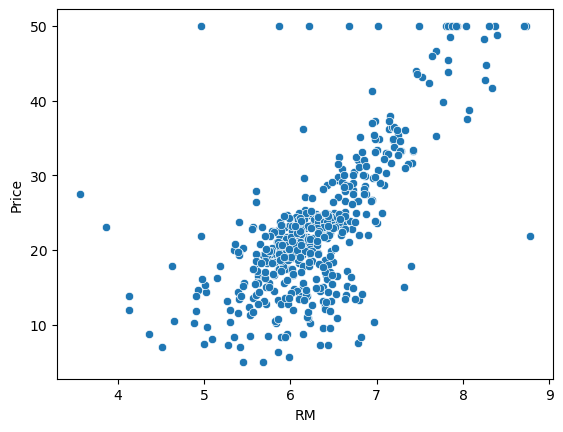

In [59]:
scatterplot(bos['RM'])

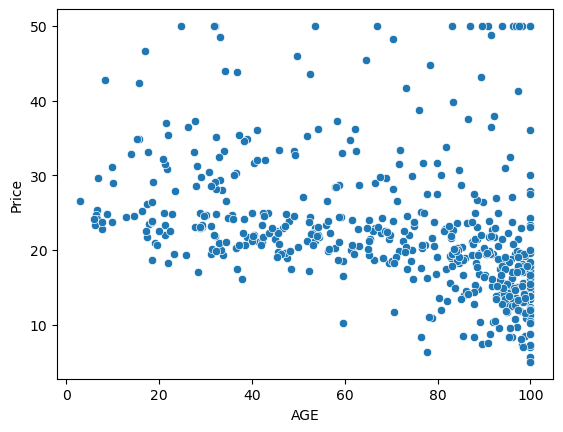

In [60]:
scatterplot(bos['AGE'])

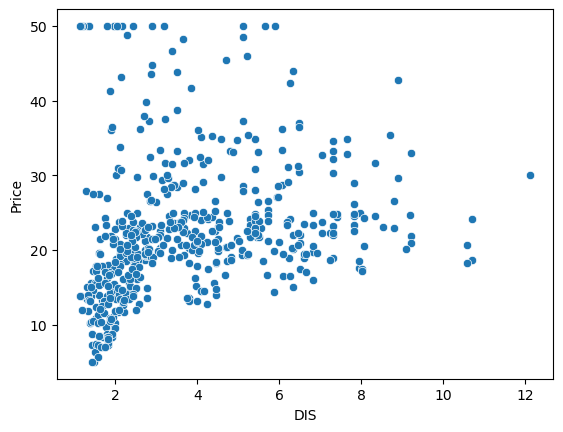

In [61]:
scatterplot(bos["DIS"])

<AxesSubplot:>

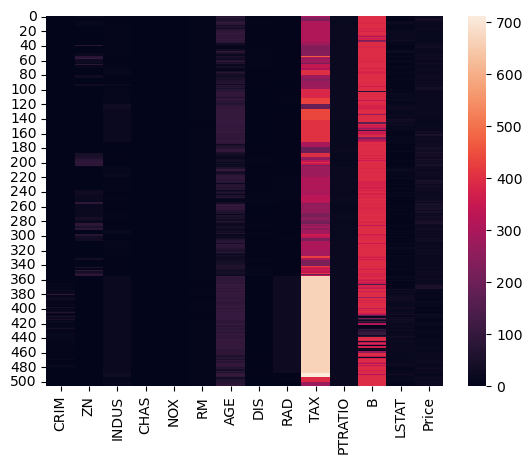

In [62]:
sns.heatmap(bos)

In [63]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

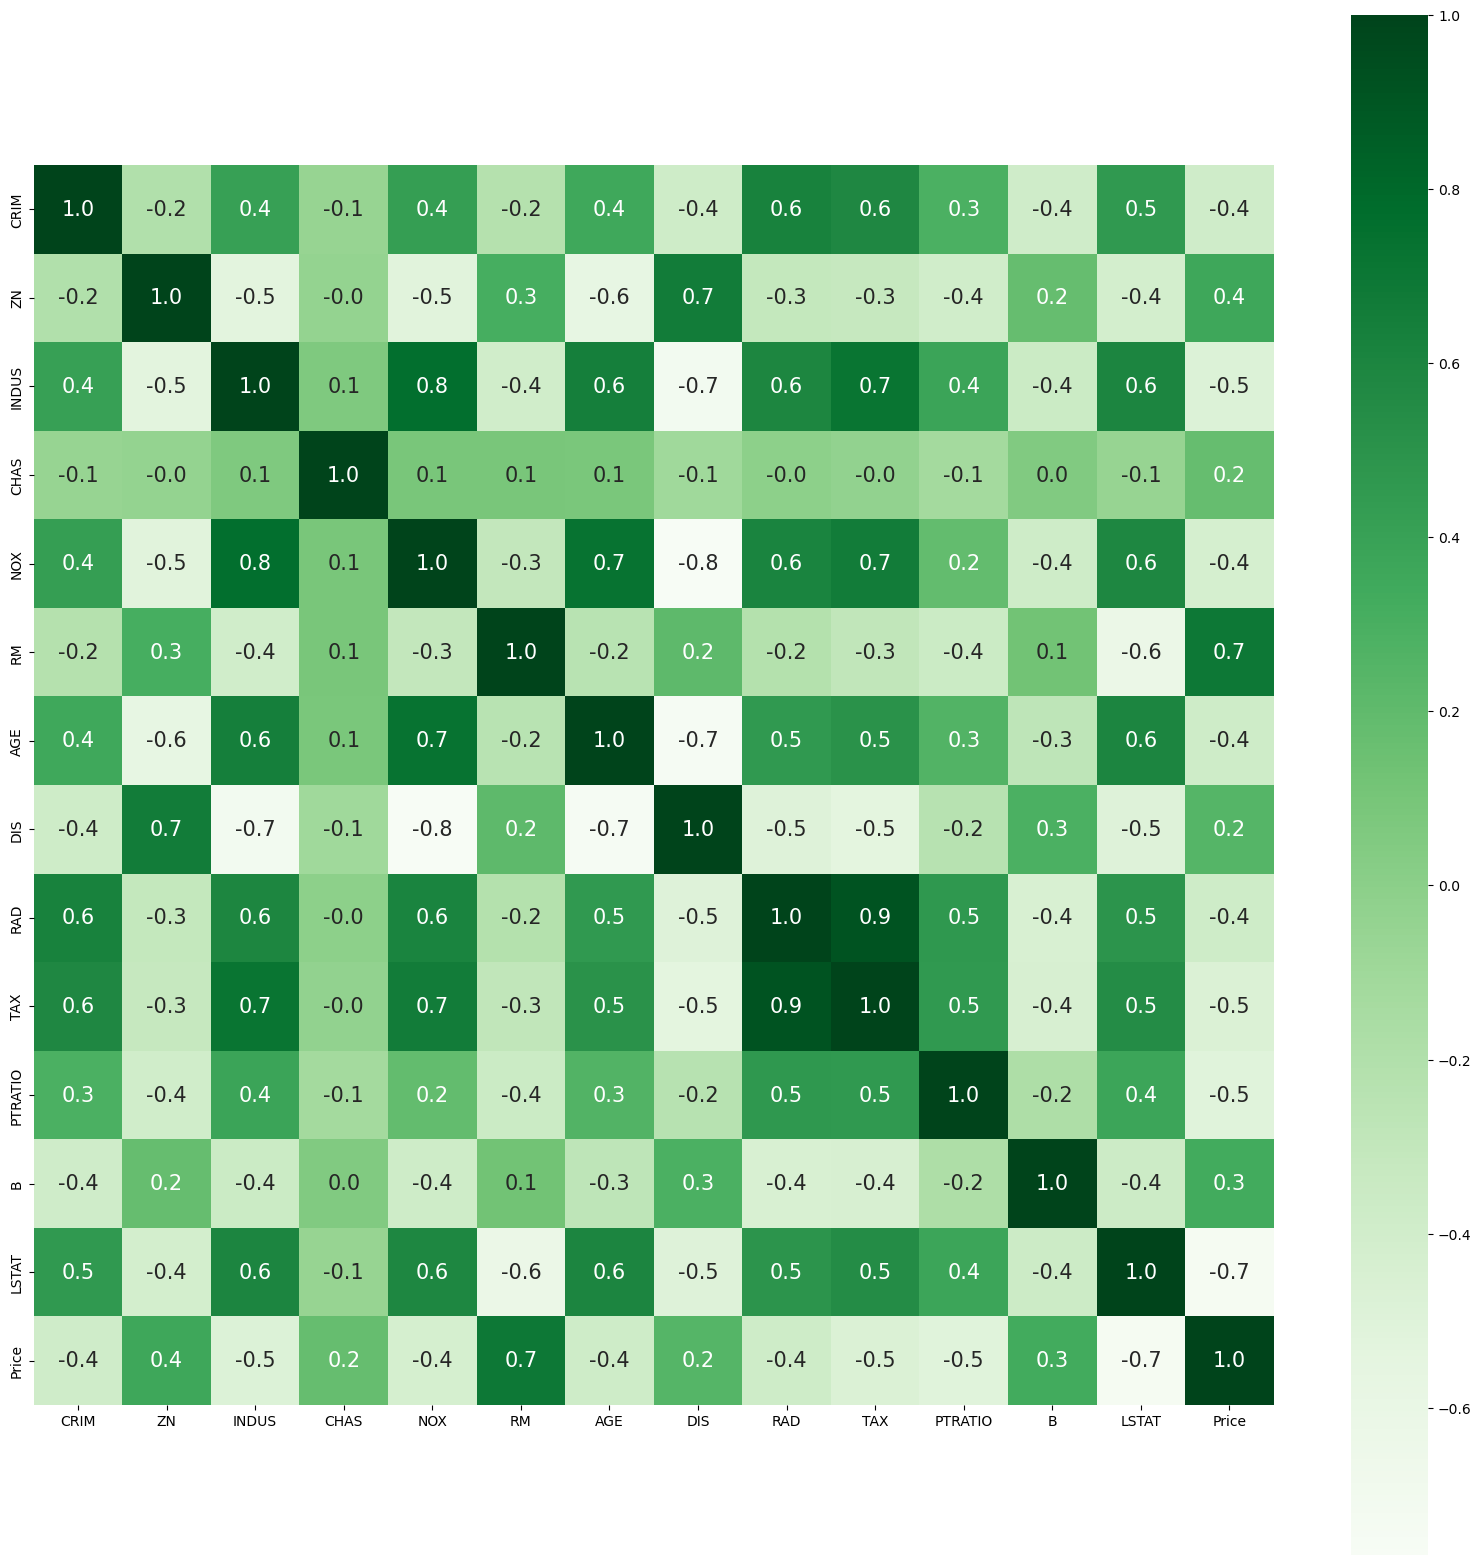

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(bos.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [65]:
X = bos.drop(['Price'],axis=1)

In [66]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [67]:
y = bos['Price']

In [68]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [70]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   
..        ...   ...    ...   ...     ...    ...   ...     ...   ...    ...   
106   0.17120   0.0   8.56   0.0  0.5200  5.836  91.9  2.2110   5.0  384.0   
270   0.29916  20.0   6.96   0.0  0.4640  5.856  42.1  4.4290   3.0  223.0   
348   0.01501  80.0   2.01   0.0  0.4350  6.635  29.7  8.3440   4.0  280.0   
435  11.16040   0.0  18.10   0.0  0.7400  6.629  94.6  2.1247  24.0  666.0   
102   0.22876   0.0   8.56   0.0  0.5200  6.405  85.4  2.7147   5.0  384.0   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15 

## Standarding the data 

In [71]:
sc = StandardScaler()


In [72]:
x_train_scaler = sc.fit_transform(X_train)

In [73]:
x_train_scaler

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [74]:
x_test_scalar = sc.fit_transform(X_test)

In [75]:
x_test_scalar

array([[-0.47678706, -0.44018634, -1.14921855, ..., -1.33894103,
         0.41308415, -0.60871618],
       [-0.48154797,  1.2289217 , -0.79642905, ..., -0.78082095,
         0.42860582, -1.3730385 ],
       [-0.47490641, -0.44018634,  2.39213032, ...,  0.61447927,
         0.3533257 ,  0.64388464],
       ...,
       [ 1.40372123, -0.44018634,  0.95107489, ...,  0.67029128,
        -3.58319267,  1.08083841],
       [-0.48216228, -0.44018634, -1.08344424, ..., -0.27851287,
         0.41851673, -0.07882303],
       [-0.47633711, -0.44018634,  0.16327799, ..., -0.16688885,
         0.27704776, -0.62258773]])

## Buliding model with scaled data 

In [76]:
Linear = LinearRegression()
Linear.fit(x_train_scaler,y_train)

LinearRegression()

In [77]:
linear_train_predict_scalar = Linear.predict(x_train_scaler)

In [78]:
r2_score(linear_train_predict_scalar,y_train)

0.6682392734758824

In [79]:
linear_test_predic_scalar_transform = Linear.predict(x_test_scalar)

In [80]:
r2_score(linear_test_predic_scalar_transform,y_test)

0.6324301498481748

### training with out standarzing

In [81]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [82]:
linear_train_predict = linear.predict(X_train)

In [83]:
r2_score(linear_train_predict,y_train)

0.6682392734758829

In [84]:
linear_test_predict = linear.predict(X_test)

In [85]:
r2_score(linear_test_predict,y_test)

0.6333247469014356

## Ridge Regression 

In [86]:
ridge = Ridge()
ridge.fit(x_train_scaler,y_train)


Ridge()

In [87]:
ridge_train_predict = ridge.predict(x_train_scaler)

In [88]:
r2_score(ridge_train_predict,y_train)

0.666918672098292

In [89]:
ridge_test_predict = ridge.predict(x_test_scalar)

In [90]:
r2_score(ridge_test_predict,y_test)

0.6304165573684348

### Lasso

In [91]:
lasso = Lasso()
lasso.fit(x_train_scaler,y_train)

Lasso()

In [92]:
lass_train_predict = lasso.predict(x_train_scaler)

In [93]:
r2_score(lass_train_predict,y_train)

0.3416880222337598

In [94]:
lass_test_predict = lasso.predict(x_test_scalar)

In [95]:
r2_score(lass_test_predict,y_test)

0.34551715974830277

##  Elastic net

In [96]:
elastic = ElasticNet()
elastic.fit(x_train_scaler,y_train)

ElasticNet()

In [97]:
elastic_train_predict = elastic.predict(x_train_scaler)

In [98]:
r2_score(elastic_train_predict,y_train)

0.14503864050028736

In [99]:
elastic_test_predict = elastic.predict(x_test_scalar)



In [100]:
r2_score(elastic_test_predict,y_test)

0.20550624146385266

### Results are unexpected to applying hypoparamter tunning  gridsearch cv


In [101]:
paramters ={'alpha':[1,2,3,4,5,6,100,1e-10,1e-15,1e-1,20,30,40,50,60,100]}


In [102]:
ridge_grid_search = GridSearchCV(ridge,paramters,scoring = 'neg_mean_squared_error',cv=10,verbose=1)
ridge_grid_search.fit(x_train_scaler,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 100, 1e-10, 1e-15, 0.1, 20,
                                   30, 40, 50, 60, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [103]:
print(ridge_grid_search.best_params_)

{'alpha': 6}


In [104]:
print(ridge_grid_search.best_score_)

-24.062513874035364


In [105]:
ridge_test_predictio_gridsearch_cv = ridge_grid_search.predict(x_test_scalar)

In [106]:
r2_score(ridge_test_predictio_gridsearch_cv,y_test)

0.6211063195130084

### Elastic net

In [107]:
parameters = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,6,10,30,20,50,60,70 ,80,90,100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [108]:
elastic_net_grid_search = GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=10,verbose=1)

In [109]:
elastic_net_grid_search.fit(x_train_scaler,y_train)

Fitting 10 folds for each of 510 candidates, totalling 5100 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 6, 10,
                                   30, 20, 50, 60, 70, 80, 90, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [110]:
print(elastic_net_grid_search.best_params_)

{'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 10}


In [111]:
print(elastic_net_grid_search.best_score_)

-24.260747234985306


In [112]:
elastic_test_predictio_gridsearch_cv = elastic_net_grid_search.predict(x_test_scalar)

In [113]:
r2_score(elastic_test_predictio_gridsearch_cv,y_test)

0.6127045267595701

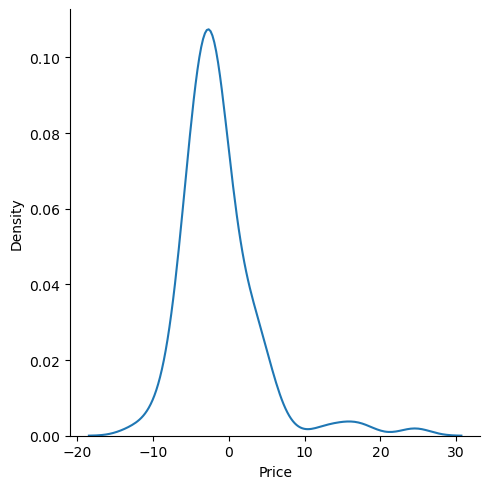

In [114]:
sns.displot(y_test-elastic_test_predictio_gridsearch_cv,kind='kde')

## After Performing All hypo paramter tunning conculded ridge is giving best score

In [115]:
ls

 Volume in drive E is Data Science Data 
 Volume Serial Number is 7279-9DC9

 Directory of E:\Data Science Total\machine learning assignments by ineuron\linear regression pratical assignments

04-04-2023  11:22    <DIR>          .
15-02-2023  12:19    <DIR>          ..
03-04-2023  14:45    <DIR>          .ipynb_checkpoints
31-03-2023  19:47    <DIR>          __pycache__
04-04-2023  11:14             1,334 app.py
05-04-2023  11:00            42,361 bos.xlsx
04-04-2023  11:22         1,705,776 Boston .ipynb
03-04-2023  14:51            18,062 Boston House Price Prediction .ipynb
03-04-2023  11:41             4,016 boston_model.pickle
04-04-2023  10:41             4,764 ridge_new_model.pickle
31-03-2023  20:01    <DIR>          templates
24-03-2023  17:13                72 Untitled.ipynb
24-03-2023  17:16               589 Untitled1.ipynb
               8 File(s)      1,776,974 bytes
               5 Dir(s)  133,612,445,696 bytes free


In [116]:
model = pickle.load(open('ridge_new_model.pickle','rb'))

In [117]:
model_results = model.predict(x_test_scalar)

In [118]:
r2_score(model_results,y_test)

0.6211063195130084

In [123]:
data = np.array([0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]).reshape(1,-1)

In [124]:
x_data = sc.fit(data)

In [125]:
model.predict(data)

array([8.99957286])

In [ ]:
X